In [1]:
# Libraries
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
# Constants
game_sit_feat = ['month', 'year', 'inning', 'inning_topbot', 
                 'outs', 'strikes', 'balls', 'pitch_number', 
                 'on_1b', 'on_2b', 'on_3b', 'score_diff', 
                 'of_std', 'of_strat', 'if_std', 'if_strat', 'if_shift']
wo_recursive_feat = game_sit_feat + ['Pitcher_Tend_FF', 'Pitcher_Tend_CU', 'Pitcher_Tend_CH', 'Pitcher_Tend_SL', 'Pitcher_Tend_SI', 
                                     'Pitcher_Strike_Tend_FF', 'Pitcher_Strike_Tend_CU', 'Pitcher_Strike_Tend_CH', 'Pitcher_Strike_Tend_SL', 'Pitcher_Strike_Tend_SI', 
                                     'batter_stance', 'Strike_Tend_FF', 'Strike_Tend_CU', 'Strike_Tend_CH', 'Strike_Tend_SL', 'Strike_Tend_SI', 'Overall_Strike_Tend', 
                                     'Slug_Avg_FF', 'Slug_Avg_CU', 'Slug_Avg_CH', 'Slug_Avg_SL', 'Slug_Avg_SI', 'Overall_Slug_Avg', 
                                     'Zone_1_Strike_Pcnt', 'Zone_2_Strike_Pcnt', 'Zone_3_Strike_Pcnt', 'Zone_4_Strike_Pcnt', 'Zone_5_Strike_Pcnt', 'Zone_6_Strike_Pcnt', 'Zone_7_Strike_Pcnt', 'Zone_8_Strike_Pcnt', 'Zone_9_Strike_Pcnt', 'Zone_11_Strike_Pcnt', 'Zone_12_Strike_Pcnt', 'Zone_13_Strike_Pcnt', 'Zone_14_Strike_Pcnt']

In [3]:
# Import the data
X_whole = pd.read_csv("../data/VerlanderOnly_X_train.csv").to_numpy()
y = pd.read_csv("../data/VerlanderOnly_y_train.csv").to_numpy().T[0]

verlander_cols = np.array(pd.read_csv("../data/VerlanderOnlyDataset.csv", index_col=0).columns)
game_sit_cols = np.where(np.isin(verlander_cols, game_sit_feat))[0] - 1
wo_recursive_cols = np.where(np.isin(verlander_cols, wo_recursive_feat))[0] - 1

X_game_sit = X_whole[:, game_sit_cols]
X_wo_recurse = X_whole[:, wo_recursive_cols]

## Non-Regularized

In [4]:
# Linear SVM - Without Recursive Features: Non-regularized (53 features)
svm_wo_recurse_models = []
svm_wo_recurse_train_accs = []
svm_wo_recurse_test_accs = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(X_wo_recurse, y):
    X_train, X_test = X_wo_recurse[train_index], X_wo_recurse[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = LinearSVC(max_iter=1000)
    
    model.fit(X_train, y_train)
    
    test_acc = model.score(X_test, y_test)
    train_acc = model.score(X_train, y_train)
    print("Train Accuracy: ", train_acc)
    print("Test Accuracy: ", test_acc)
    
    print("Predictions:")
    print(np.unique(model.predict(X_test)))
    print(np.unique(model.predict(X_test), return_counts=True)[1], "\n")
    print("Actual:")
    print(np.unique(y_test))
    print(np.unique(y_test, return_counts=True)[1], "\n")
    
    svm_wo_recurse_train_accs.append(train_acc)
    svm_wo_recurse_test_accs.append(test_acc)
    svm_wo_recurse_models.append(model)

/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.581899808863404
Test Accuracy:  0.5820444444444445
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[  20  373 5221    9    2] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  939 3277   38  613] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.5848779837311642
Test Accuracy:  0.5799111111111112
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[  13  171 5426   10    5] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3277   39  613] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.583696328562539
Test Accuracy:  0.5807254623044097
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[  30  231 5349    7    7] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.5834296381900613
Test Accuracy:  0.5839260312944523
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[  25  177 5405    1   16] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 

Train Accuracy:  0.582451773490977
Test Accuracy:  0.5842816500711238
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[  14  194 5399   14    3] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  938 3278   38  612] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [5]:
# Linear SVM - Game Situational Features: Non-regularized (17 features)
svm_game_sit_models = []
svm_game_sit_train_accs = []
svm_game_sit_test_accs = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(X_game_sit, y):
    X_train, X_test = X_game_sit[train_index], X_game_sit[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = LinearSVC(max_iter=1000)
    
    model.fit(X_train, y_train)
    
    test_acc = model.score(X_test, y_test)
    train_acc = model.score(X_train, y_train)
    print("Train Accuracy: ", train_acc)
    print("Test Accuracy: ", test_acc)
    
    print("Predictions:")
    print(np.unique(model.predict(X_test)))
    print(np.unique(model.predict(X_test), return_counts=True)[1], "\n")
    print("Actual:")
    print(np.unique(y_test))
    print(np.unique(y_test, return_counts=True)[1], "\n")
    
    svm_game_sit_train_accs.append(train_acc)
    svm_game_sit_test_accs.append(test_acc)
    svm_game_sit_models.append(model)

/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.5811886029248344
Test Accuracy:  0.5825777777777777
Predictions:
['CU' 'FF']
[ 255 5370] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  939 3277   38  613] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.5826110148019736
Test Accuracy:  0.5799111111111112
Predictions:
['CU' 'FF']
[ 159 5466] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3277   39  613] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.582451773490977
Test Accuracy:  0.5819701280227596
Predictions:
['CU' 'FF']
[ 155 5469] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.5815183571873055
Test Accuracy:  0.5833926031294452
Predictions:
['CU' 'FF' 'SL']
[ 202 5421    1] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 

Train Accuracy:  0.5818739443506089
Test Accuracy:  0.5812588904694168
Predictions:
['CU' 'FF']
[ 169 5455] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  938 3278   38  612] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [6]:
# Linear SVM - All Features: Non-regularized (100 features)
svm_whole_models = []
svm_whole_train_accs = []
svm_whole_test_accs = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(X_whole, y):
    X_train, X_test = X_whole[train_index], X_whole[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = LinearSVC(max_iter=1000)
    
    model.fit(X_train, y_train)
    
    test_acc = model.score(X_test, y_test)
    train_acc = model.score(X_train, y_train)
    print("Train Accuracy: ", train_acc)
    print("Test Accuracy: ", test_acc)
    
    print("Predictions:")
    print(np.unique(model.predict(X_test)))
    print(np.unique(model.predict(X_test), return_counts=True)[1], "\n")
    print("Actual:")
    print(np.unique(y_test))
    print(np.unique(y_test, return_counts=True)[1], "\n")
    
    svm_whole_train_accs.append(train_acc)
    svm_whole_test_accs.append(test_acc)
    svm_whole_models.append(model)

/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.592656798684269
Test Accuracy:  0.592
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[  27  284 5216   28   70] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  939 3277   38  613] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.5935902564786416
Test Accuracy:  0.5898666666666667
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[  33  301 5202   31   58] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3277   39  613] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.5916970397368655
Test Accuracy:  0.5908605974395448
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[  40  284 5216   31   53] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.5912970041781491
Test Accuracy:  0.5915718349928877
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[  45  303 5150   27   99] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 

Train Accuracy:  0.5934305271579696
Test Accuracy:  0.5869487908961594
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[  22  281 5224   30   67] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  938 3278   38  612] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Regularized

In [7]:
# Linear SVM - Without Recursive Features: Regularized (53 features)
svm_wo_recurse_reg_models = []
svm_wo_recurse_reg_test_accs = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(X_wo_recurse, y):
    X_train, X_test = X_wo_recurse[train_index], X_wo_recurse[test_index]
    y_train, y_test = y[train_index], y[test_index]

    scaler = MinMaxScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    
    model = LinearSVC(max_iter=1000)
    
    model.fit(scaled_X_train, y_train)
    
    test_acc = model.score(scaled_X_test, y_test)
    train_acc = model.score(scaled_X_train, y_train)
    print("Train Accuracy: ", train_acc)
    print("Test Accuracy: ", test_acc)
    
    print("Predictions:")
    print(np.unique(model.predict(scaled_X_test)))
    print(np.unique(model.predict(scaled_X_test), return_counts=True)[1], "\n")
    print("Actual:")
    print(np.unique(y_test))
    print(np.unique(y_test, return_counts=True)[1], "\n")
    
    svm_wo_recurse_reg_test_accs.append(test_acc)
    svm_wo_recurse_reg_models.append(model)

Train Accuracy:  0.5833666711117038
Test Accuracy:  0.5856
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[  20  239 5349   10    7] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  939 3277   38  613] 

Train Accuracy:  0.5848779837311642
Test Accuracy:  0.5777777777777777
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[  11  213 5384   12    5] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3277   39  613] 

Train Accuracy:  0.5835629833763001
Test Accuracy:  0.5785917496443812
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[  29  248 5333    9    5] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 

Train Accuracy:  0.5824962218863899
Test Accuracy:  0.585348506401138
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[  22  231 5359    3    9] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 

Train Accuracy:  0.5828518090496934
Test Accuracy:  0.5839260312944523
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[  12  194 5399   15    4] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  938 3278   38  

In [8]:
# LinearSVC - Game Situational Features: Regularized (17 features)
svm_game_sit_reg_models = []
svm_game_sit_reg_test_accs = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(X_game_sit, y):
    X_train, X_test = X_game_sit[train_index], X_game_sit[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    scaler = MinMaxScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    
    model = LinearSVC(max_iter=1000)
    
    model.fit(scaled_X_train, y_train)
    
    test_acc = model.score(scaled_X_test, y_test)
    train_acc = model.score(scaled_X_train, y_train)
    print("Train Accuracy: ", train_acc)
    print("Test Accuracy: ", test_acc)
    
    print("Predictions:")
    print(np.unique(model.predict(scaled_X_test)))
    print(np.unique(model.predict(scaled_X_test), return_counts=True)[1], "\n")
    print("Actual:")
    print(np.unique(y_test))
    print(np.unique(y_test, return_counts=True)[1], "\n")
    
    svm_game_sit_reg_test_accs.append(test_acc)
    svm_game_sit_reg_models.append(model)

Train Accuracy:  0.5815442058941193
Test Accuracy:  0.5829333333333333
Predictions:
['CU' 'FF']
[ 207 5418] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  939 3277   38  613] 

Train Accuracy:  0.5829666177712584
Test Accuracy:  0.5783111111111111
Predictions:
['CU' 'FF']
[ 200 5425] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3277   39  613] 

Train Accuracy:  0.5823628767001511
Test Accuracy:  0.5782361308677099
Predictions:
['CU' 'FF']
[ 227 5397] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 

Train Accuracy:  0.5812961152102409
Test Accuracy:  0.5830369843527738
Predictions:
['CU' 'FF']
[ 214 5410] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 

Train Accuracy:  0.5820072895368478
Test Accuracy:  0.5814366998577525
Predictions:
['CU' 'FF']
[ 158 5466] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  938 3278   38  612] 



In [9]:
# Linear SVC - All Features: Regularized (100 features)
svm_whole_reg_models = []
svm_whole_reg_test_accs = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(X_whole, y):
    X_train, X_test = X_whole[train_index], X_whole[test_index]
    y_train, y_test = y[train_index], y[test_index]

    scaler = MinMaxScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    
    model = LinearSVC(max_iter=1000)
    
    model.fit(scaled_X_train, y_train)
    
    test_acc = model.score(scaled_X_test, y_test)
    train_acc = model.score(scaled_X_train, y_train)
    print("Train Accuracy: ", train_acc)
    print("Test Accuracy: ", test_acc)
    
    print("Predictions:")
    print(np.unique(model.predict(scaled_X_test)))
    print(np.unique(model.predict(scaled_X_test), return_counts=True)[1], "\n")
    print("Actual:")
    print(np.unique(y_test))
    print(np.unique(y_test, return_counts=True)[1], "\n")
    
    svm_whole_reg_test_accs.append(test_acc)
    svm_whole_reg_models.append(model)

/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.5927901497977508
Test Accuracy:  0.5889777777777778
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[  35  353 5151   23   63] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  939 3277   38  613] 

Train Accuracy:  0.593323554251678
Test Accuracy:  0.5898666666666667
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[  36  307 5190   31   61] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3277   39  613] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.5922748688772336
Test Accuracy:  0.5915718349928877
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[  41  314 5166   33   70] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy:  0.5912525557827363
Test Accuracy:  0.5913940256045519
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[  37  296 5170   27   94] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 

Train Accuracy:  0.5929860432038403
Test Accuracy:  0.5874822190611664
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[  25  246 5245   31   77] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  938 3278   38  612] 



/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## PCA

In [10]:
# Linear SVM - Without Recursive Features: PCA 95% (53 features)
svm_wo_recurse_pca_models = []
svm_wo_recurse_pca_test_accs = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(X_wo_recurse, y):
    X_train, X_test = X_wo_recurse[train_index], X_wo_recurse[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    scaler = MinMaxScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    
    pca = PCA(n_components=0.95, svd_solver='full')
    reduced_X_train = pca.fit_transform(scaled_X_train)
    reduced_X_test = pca.transform(scaled_X_test)
    
    model = LinearSVC(max_iter=1000)
    
    model.fit(reduced_X_train, y_train)
    
    test_acc = model.score(reduced_X_test, y_test)
    print("Train Accuracy: ", model.score(reduced_X_train, y_train))
    print("Test Accuracy: ", test_acc)
    
    print("Predictions:")
    print(np.unique(model.predict(reduced_X_test)))
    print(np.unique(model.predict(reduced_X_test), return_counts=True)[1], "\n")
    print("Actual:")
    print(np.unique(y_test))
    print(np.unique(y_test, return_counts=True)[1], "\n")
    
    svm_wo_recurse_pca_test_accs.append(test_acc)
    svm_wo_recurse_pca_models.append(model)

Train Accuracy:  0.5815886562652798
Test Accuracy:  0.5836444444444444
Predictions:
['CU' 'FF' 'SL']
[ 219 5403    3] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  939 3277   38  613] 

Train Accuracy:  0.5828332666577766
Test Accuracy:  0.5792
Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[   4  190 5427    2    2] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3277   39  613] 

Train Accuracy:  0.5819183927460219
Test Accuracy:  0.5778805120910384
Predictions:
['CH' 'CU' 'FF' 'SL']
[   3  234 5385    2] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 

Train Accuracy:  0.5813405636056538
Test Accuracy:  0.583570412517781
Predictions:
['CH' 'CU' 'FF' 'SL']
[   9  218 5392    5] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 

Train Accuracy:  0.5813850120010667
Test Accuracy:  0.5832147937411095
Predictions:
['CH' 'CU' 'FF' 'SL']
[   1  172 5446    5] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  938 3278   38  612] 



In [11]:
# Linear SVM - Game Situational Features: PCA 95% (53 features)
svm_game_sit_pca_models = []
svm_game_sit_pca_test_accs = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(X_game_sit, y):
    X_train, X_test = X_game_sit[train_index], X_game_sit[test_index]
    y_train, y_test = y[train_index], y[test_index]

    scaler = MinMaxScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    
    pca = PCA(n_components=0.95, svd_solver='full')
    reduced_X_train = pca.fit_transform(scaled_X_train)
    reduced_X_test = pca.transform(scaled_X_test)
    
    model = LinearSVC(max_iter=1000)
    
    model.fit(reduced_X_train, y_train)
    
    test_acc = model.score(reduced_X_test, y_test)
    print("Train Accuracy: ", model.score(reduced_X_train, y_train))
    print("Test Accuracy: ", test_acc)
    
    print("Predictions:")
    print(np.unique(model.predict(reduced_X_test)))
    print(np.unique(model.predict(reduced_X_test), return_counts=True)[1], "\n")
    print("Actual:")
    print(np.unique(y_test))
    print(np.unique(y_test, return_counts=True)[1], "\n")
    
    svm_game_sit_pca_test_accs.append(test_acc)
    svm_game_sit_pca_models.append(model)

Train Accuracy:  0.5816331066364404
Test Accuracy:  0.5824
Predictions:
['CU' 'FF' 'SL']
[ 203 5420    2] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  939 3277   38  613] 

Train Accuracy:  0.5818553584922435
Test Accuracy:  0.5802666666666667
Predictions:
['CU' 'FF' 'SL']
[ 183 5439    3] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3277   39  613] 

Train Accuracy:  0.5821406347230865
Test Accuracy:  0.5777027027027027
Predictions:
['CU' 'FF' 'SL']
[ 221 5400    3] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 

Train Accuracy:  0.5811627700240022
Test Accuracy:  0.582325746799431
Predictions:
['CU' 'FF' 'SL']
[ 209 5410    5] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 

Train Accuracy:  0.5808960796515246
Test Accuracy:  0.5816145092460882
Predictions:
['CU' 'FF' 'SL']
[ 156 5467    1] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  938 3278   38  612] 



In [12]:
# Linear SVC - Whole Features: PCA 95% (53 features)
svm_whole_pca_models = []
svm_whole_pca_train_accs = []
svm_whole_pca_test_accs = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(X_whole, y):
    X_train, X_test = X_whole[train_index], X_whole[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    scaler = MinMaxScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    
    pca = PCA(n_components=0.95, svd_solver='full')
    reduced_X_train = pca.fit_transform(scaled_X_train)
    reduced_X_test = pca.transform(scaled_X_test)
    
    print("PCA Reduced Dimensions: ", reduced_X_train.shape)
    
    model = LinearSVC(max_iter=1000)
    
    model.fit(reduced_X_train, y_train)
    
    test_acc = model.score(reduced_X_test, y_test)
    train_acc = model.score(reduced_X_train, y_train)
    print("Train Accuracy: ", train_acc)
    print("Test Accuracy: ", test_acc, "\n")
    
    print("Predictions:")
    print(np.unique(model.predict(reduced_X_test)))
    print(np.unique(model.predict(reduced_X_test), return_counts=True)[1], "\n")
    print("Actual:")
    print(np.unique(y_test))
    print(np.unique(y_test, return_counts=True)[1], "\n")
    
    svm_whole_pca_train_accs.append(train_acc)
    svm_whole_pca_test_accs.append(test_acc)
    svm_whole_pca_models.append(model)

PCA Reduced Dimensions:  (22497, 35)
Train Accuracy:  0.5877672578566031
Test Accuracy:  0.5888 

Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[  16  313 5227   11   58] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 758  939 3277   38  613] 

PCA Reduced Dimensions:  (22497, 35)
Train Accuracy:  0.5899453260434725
Test Accuracy:  0.5868444444444444 

Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[  13  288 5248   21   55] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3277   39  613] 

PCA Reduced Dimensions:  (22498, 35)
Train Accuracy:  0.5877411325451152
Test Accuracy:  0.5867709815078236 

Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[  12  311 5210   20   71] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 

PCA Reduced Dimensions:  (22498, 35)
Train Accuracy:  0.5892968263845675
Test Accuracy:  0.5876600284495022 

Predictions:
['CH' 'CU' 'FF' 'SI' 'SL']
[  20  276 5228   20   80] 

Actual:
['CH' 'CU' 'FF' 'SI' 'SL']
[ 757  939 3278   38  612] 

PCA Reduced Dimensions:  (22498, 35)
Tra

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

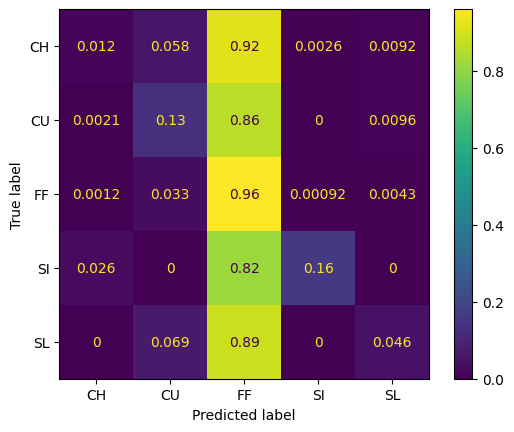

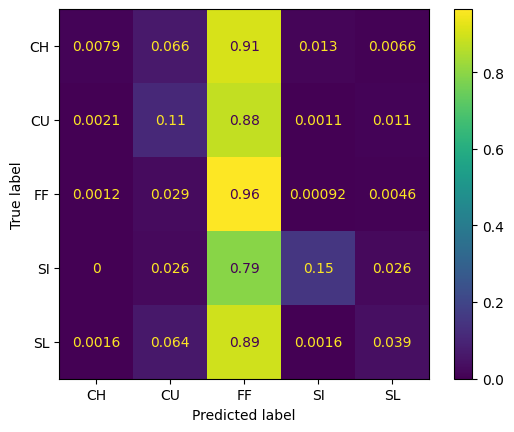

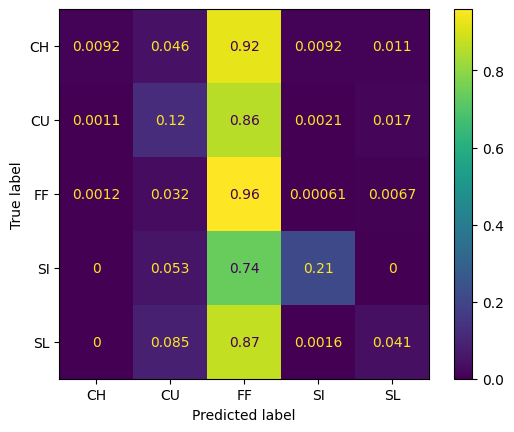

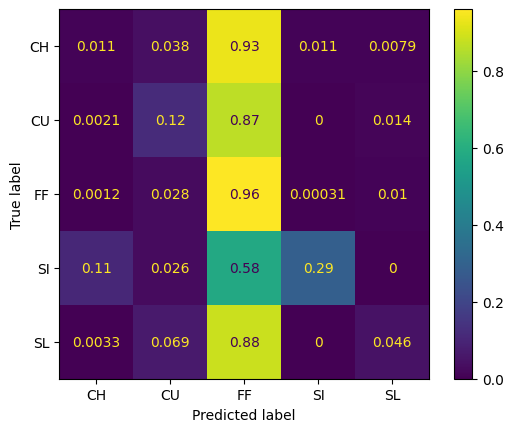

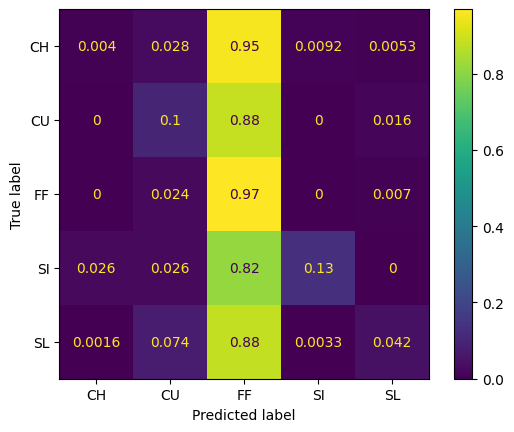

In [14]:
# Linear SVC - Whole Features: PCA 95% (53 features)
for fold, (train_index, test_index) in enumerate(skf.split(X_whole, y)):
    X_train, X_test = X_whole[train_index], X_whole[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    scaler = MinMaxScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    
    pca = PCA(n_components=0.95, svd_solver='full')
    reduced_X_train = pca.fit_transform(scaled_X_train)
    reduced_X_test = pca.transform(scaled_X_test)
    
    model = svm_whole_pca_models[fold]

    # "pred" - Probability: Given Predicted X, what is probability it is actually Y?
    # "true" - Probability: Given Actually Y, what is probability we guessed X?
    cm = confusion_matrix(y_test, model.predict(reduced_X_test), labels=model.classes_, normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_)
    disp.plot()
    plt.show()

## Ensemble

In [16]:
# Ensemble of LogReg Models
ensemble_models = []
ensemble_train_accs = []
ensemble_test_accs = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(skf.split(X_whole, y)):
    X_train, X_test = X_whole[train_index], X_whole[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    scaler = MinMaxScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    
    pca = PCA(n_components=0.95, svd_solver='full')
    reduced_X_train = pca.fit_transform(scaled_X_train)
    reduced_X_test = pca.transform(scaled_X_test)
    
    svm_pca_model = svm_whole_pca_models[fold]
    svm_stdz_model = svm_whole_reg_models[fold]
    svm_model = svm_whole_models[fold]

    pca_mod_probs_train = svm_pca_model.predict(reduced_X_train)
    stdz_mod_probs_train = svm_stdz_model.predict(scaled_X_train)
    mod_probs_train = svm_model.predict(X_train)
    
    pca_mod_probs_test = svm_pca_model.predict(reduced_X_test)
    stdz_mod_probs_test = svm_stdz_model.predict(scaled_X_test)
    mod_probs_test = svm_model.predict(X_test)
    
    print("Agreement PCA-STDZ: ", np.mean(pca_mod_probs_test == stdz_mod_probs_test))
    print("Agreement PCA-REGULAR: ", np.mean(pca_mod_probs_test == mod_probs_test))
    print("Agreement STDZ-REGULAR: ", np.mean(stdz_mod_probs_test == mod_probs_test))
    
#     model_prob_votes_train = np.hstack([pca_mod_probs_train, stdz_mod_probs_train, mod_probs_train])
#     model_prob_votes_test = np.hstack([pca_mod_probs_test, stdz_mod_probs_test, mod_probs_test])
    
#     ensemble = LogisticRegression()
#     ensemble.fit(model_prob_votes_train, y_train)
    
#     train_acc = ensemble.score(model_prob_votes_train, y_train) 
#     test_acc = ensemble.score(model_prob_votes_test, y_test)
#     print("Train Accuracy: ", train_acc)
#     print("Test Accuracy: ", test_acc, "\n")
    
#     print("Predictions:")
#     print(np.unique(ensemble.predict(model_prob_votes_test)))
#     print(np.unique(ensemble.predict(model_prob_votes_test), return_counts=True)[1], "\n")
#     print("Actual:")
#     print(np.unique(y_test))
#     print(np.unique(y_test, return_counts=True)[1], "\n")
    
#     ensemble_train_accs.append(train_acc)
#     ensemble_test_accs.append(test_acc)
#     ensemble_models.append(ensemble)

Agreement PCA-STDZ:  0.9594666666666667
Agreement PCA-REGULAR:  0.9635555555555556
Agreement STDZ-REGULAR:  0.9845333333333334
Agreement PCA-STDZ:  0.9639111111111112
Agreement PCA-REGULAR:  0.9648
Agreement STDZ-REGULAR:  0.9928888888888889
Agreement PCA-STDZ:  0.9614153627311522
Agreement PCA-REGULAR:  0.9639046941678521
Agreement STDZ-REGULAR:  0.9886201991465149
Agreement PCA-STDZ:  0.9642603129445235
Agreement PCA-REGULAR:  0.9631934566145093
Agreement STDZ-REGULAR:  0.9935988620199147
Agreement PCA-STDZ:  0.9672830725462305
Agreement PCA-REGULAR:  0.9676386913229018
Agreement STDZ-REGULAR:  0.9912873399715505


In [22]:
print(np.mean(svm_whole_train_accs), "\t", np.mean(svm_whole_test_accs))

print(np.mean(svm_wo_recurse_train_accs), "\t", np.mean(svm_wo_recurse_test_accs))

print(np.mean(svm_game_sit_train_accs), "\t", np.mean(svm_game_sit_test_accs))

print("\t", np.mean(svm_whole_reg_test_accs))

print("\t", np.mean(svm_wo_recurse_reg_test_accs))

print("\t", np.mean(svm_game_sit_reg_test_accs))

print(np.mean(svm_whole_pca_train_accs), "\t", np.mean(svm_whole_pca_test_accs))

print("\t", np.mean(svm_wo_recurse_pca_test_accs))

print("\t", np.mean(svm_game_sit_pca_test_accs))

0.5925343252471789 	 0.5902495779990516
0.583271106567629 	 0.5821777398451082
0.5819287385511398 	 0.5818221021021022
	 0.5898585048206101
	 0.5822488130235499
	 0.580790851904536
0.5887383564102044 	 0.5875115346925872
	 0.5815020325588747
	 0.5808619250829777
